In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
data = pd.read_csv("/content/adult.csv")

In [34]:
data.head(10)
data.tail(3)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,0
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,0
48841,52,4,287927,9,2,3,5,4,0,15024,0,40,39,1


In [3]:
print(data.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [35]:
data.shape

(46720, 14)

In [36]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0
capital-gain,0


In [37]:
print(data.workclass.value_counts())
data.workclass.replace({'?': 'Others'}, inplace=True)
print(data['workclass'].value_counts())


workclass
3    32486
5     3620
1     3052
2     2542
6     1957
4     1641
0     1422
Name: count, dtype: int64
workclass
3    32486
5     3620
1     3052
2     2542
6     1957
4     1641
0     1422
Name: count, dtype: int64


/tmp/ipython-input-37-2984183058.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?': 'Others'}, inplace=True)


In [38]:
print(data['occupation'].value_counts())
data.occupation.replace({'?': 'Others'}, inplace=True)
print(data['occupation'].value_counts())

occupation
10    6117
3     5999
2     5820
0     5541
12    5403
7     4571
6     2744
8     2542
14    2209
5     1912
13    1438
4     1260
11     965
9      184
1       15
Name: count, dtype: int64
occupation
10    6117
3     5999
2     5820
0     5541
12    5403
7     4571
6     2744
8     2542
14    2209
5     1912
13    1438
4     1260
11     965
9      184
1       15
Name: count, dtype: int64


/tmp/ipython-input-38-1062126258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?': 'Others'}, inplace=True)


In [39]:
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]

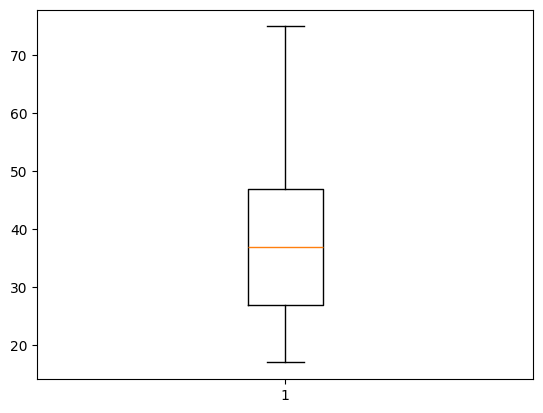

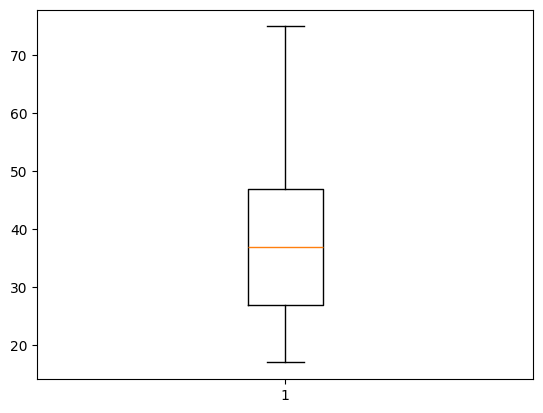

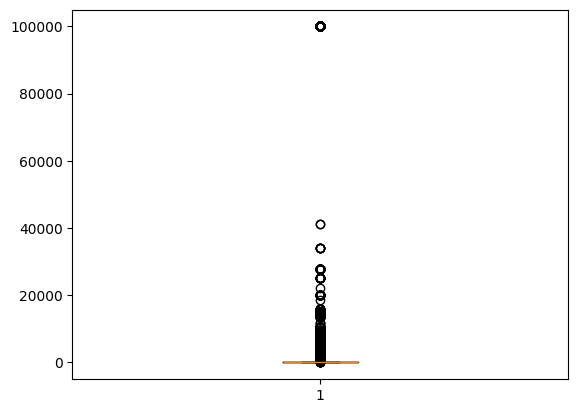

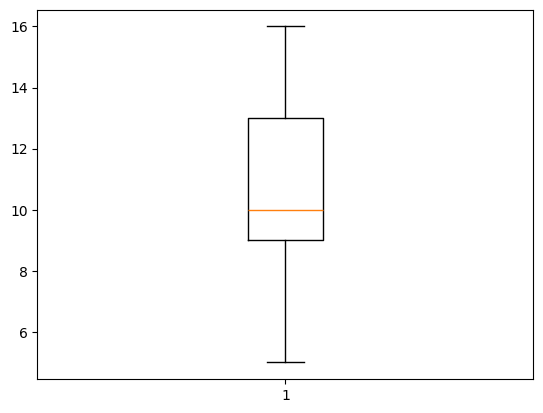

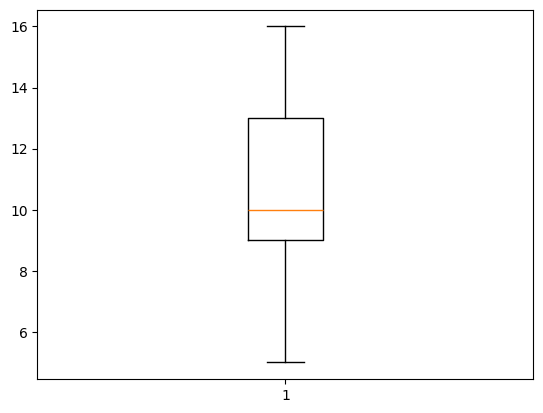

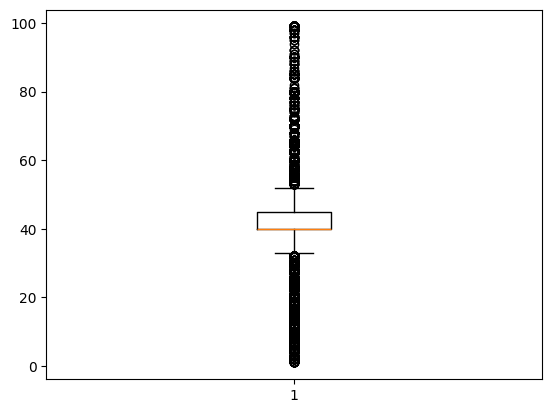

In [40]:
plt.boxplot(data['age'])
plt.show()
data = data[(data['age'] <= 75) & (data['age'] >= 17)]
plt.boxplot(data['age'])
plt.show()
plt.boxplot(data['capital-gain'])
plt.show()
plt.boxplot(data['educational-num'])
plt.show()
data = data[(data['educational-num'] <= 16) & (data['educational-num'] >= 5)]
plt.boxplot(data['educational-num'])
plt.show()
plt.boxplot(data['hours-per-week'])
plt.show()


In [41]:
data = data[(data['age'] >= 17) & (data['age'] <= 75)]
data = data[(data['educational-num'] >= 5) & (data['educational-num'] <= 16)]


In [43]:
encoder = LabelEncoder()
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [44]:
X = data.drop(columns=['income'])
y = data['income']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


In [48]:
from sklearn.linear_model import LogisticRegression
evaluate_model(LogisticRegression(), "Logistic Regression")


=== Logistic Regression ===
Confusion Matrix:
 [[9942  634]
 [1830 1610]]
Accuracy: 0.8242009132420092
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     10576
           1       0.72      0.47      0.57      3440

    accuracy                           0.82     14016
   macro avg       0.78      0.70      0.73     14016
weighted avg       0.81      0.82      0.81     14016



In [15]:
from sklearn.tree import DecisionTreeClassifier
evaluate_model(DecisionTreeClassifier(), "Decision Tree")


=== Decision Tree ===
Confusion Matrix:
 [[9167 1409]
 [1269 2171]]
Accuracy: 0.8089326484018264
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87     10576
           1       0.61      0.63      0.62      3440

    accuracy                           0.81     14016
   macro avg       0.74      0.75      0.75     14016
weighted avg       0.81      0.81      0.81     14016



In [16]:
from sklearn.ensemble import RandomForestClassifier
evaluate_model(RandomForestClassifier(), "Random Forest")


=== Random Forest ===
Confusion Matrix:
 [[9799  777]
 [1250 2190]]
Accuracy: 0.8553795662100456
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     10576
           1       0.74      0.64      0.68      3440

    accuracy                           0.86     14016
   macro avg       0.81      0.78      0.79     14016
weighted avg       0.85      0.86      0.85     14016



In [17]:
from sklearn.neighbors import KNeighborsClassifier
evaluate_model(KNeighborsClassifier(), "K-Nearest Neighbors")


=== K-Nearest Neighbors ===
Confusion Matrix:
 [[9497 1079]
 [1371 2069]]
Accuracy: 0.8251997716894978
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89     10576
           1       0.66      0.60      0.63      3440

    accuracy                           0.83     14016
   macro avg       0.77      0.75      0.76     14016
weighted avg       0.82      0.83      0.82     14016



In [26]:
from sklearn.svm import SVC
evaluate_model(SVC(), "Support Vector Machine")


=== Support Vector Machine ===
Confusion Matrix:
 [[9928  648]
 [1508 1932]]
Accuracy: 0.846175799086758
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     10576
           1       0.75      0.56      0.64      3440

    accuracy                           0.85     14016
   macro avg       0.81      0.75      0.77     14016
weighted avg       0.84      0.85      0.84     14016



In [31]:
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "K-Nearest Neighbors", "Support Vector Machine"]
accuracy_values = [
    accuracy_score(y_test, LogisticRegression().fit(X_train, y_train).predict(X_test)),
    accuracy_score(y_test, DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)),
    accuracy_score(y_test, RandomForestClassifier().fit(X_train, y_train).predict(X_test)),
    accuracy_score(y_test, KNeighborsClassifier().fit(X_train, y_train).predict(X_test)),
    accuracy_score(y_test,SVC().fit(X_train, y_train).predict(X_test))
]

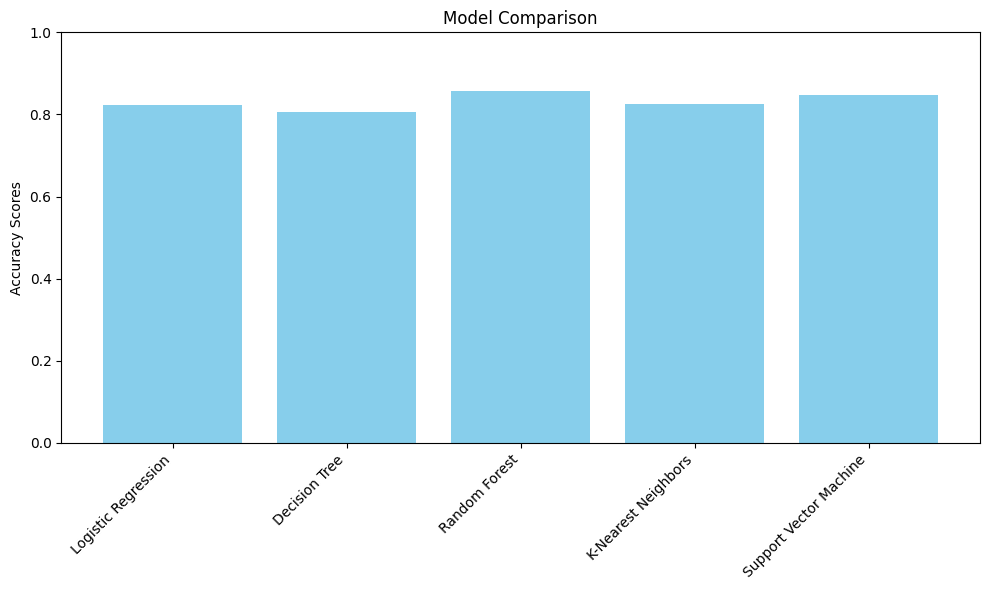

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['skyblue'])
plt.ylabel('Accuracy Scores')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()